## 1. (Computation) LU Factorization

We first implement the (strict) LU factorization.  You can start from the Matlab code for Gaussian elimination given on page 75 of the Sauer text, reproduced below.  In the code below, `a` is an n by n square matrix provided as input, `b` is a vector, though we will not be using it for the LU factorization.

```
for j = 1 : n-1
    if abs(a(j,j))<eps; error(’zero pivot encountered’); end
    for i = j+1 : n
        mult = a(i,j)/a(j,j);
        for k = j+1:n
            a(i,k) = a(i,k) - mult*a(j,k);
        end
        b(i) = b(i) - mult*b(j);
    end
end
```

1. Create a matrix L, and store the appropriate entries of $l_{i,j}$ to create the unit lower triangular factor.  

2. The code above does not zero out the entries below the diagonal.  Where is it safe to do so?  Add this in the loop.

3. Test your code on the matrix $A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}.$ Make sure to take the resulting factors $L$ and $U$ and multiply them to show you get the original `a`.  Give a larger, 3 by 3 matrix and test your algorithm.

In [12]:
import numpy as np

def lu(A):
    '''Computes the (strict) LU factorization of the matrix A'''
    n = A.shape[0]
    L = np.eye(n)
    U = A.copy()
    
    for j in range(n-1):
        if U[j, j] == 0:
            return None, None
        for i in range(j+1, n):
            multiplier = U[i, j] / U[j, j]
            L[i, j] = multiplier
            for k in range(j+1, n):
                U[i, k] -= multiplier * U[j, k]
            U[i, j] = 0
    return L, U

A = np.array([[1, 2],
              [3, 4]])
L, U = lu(A)[0], lu(A)[1]
print("Test 1")
print("A = \n", A)
print("L = \n", L)
print("U = \n", U)
print("L*U = \n", np.dot(L, U))
assert np.dot(L, U).all() == A.all()

A = np.array([[2, 1, 1],
              [4, -6, 0],
              [-2, 7, 2]])
L, U = lu(A)[0], lu(A)[1]
print("\nTest 2")
print("A = \n", A)
print("L = \n", L)
print("U = \n", U)
print("L*U = \n", np.dot(L, U))
assert np.dot(L, U).all() == A.all()


Test 1
A = 
 [[1 2]
 [3 4]]
L = 
 [[1. 0.]
 [3. 1.]]
U = 
 [[ 1  2]
 [ 0 -2]]
L*U = 
 [[1. 2.]
 [3. 4.]]

Test 2
A = 
 [[ 2  1  1]
 [ 4 -6  0]
 [-2  7  2]]
L = 
 [[ 1.  0.  0.]
 [ 2.  1.  0.]
 [-1. -1.  1.]]
U = 
 [[ 2  1  1]
 [ 0 -8 -2]
 [ 0  0  1]]
L*U = 
 [[ 2.  1.  1.]
 [ 4. -6.  0.]
 [-2.  7.  2.]]


## 2. Operation Counts

We will count the floating point operations involved in the (strict) LU factorization algorithm.
We measure in terms of floating point operations, for example, the command 
`a(i,k) = a(i,k) - mult*a(j,k);` in the
innermost loop of the pseudocode has two operations, addition and multiplication, which
are counted equally.

1. (Theory) Compute the time of the inner loop in terms of $n$ and $j$,
by expressing it as a summation of the form:
$$\sum_{k = ?}^n 2 = \dots$$

2. (Theory) The outer two loops can be added as summations, so that the computational cost is a triple sum.  Write it out and compute.

3. (Computation) You can time your algorithm using 
```
    import timeit
    start_all = timeit.default_timer()
    # run code here
    stop_all = timeit.default_timer()
    print('Time: ', stop_all - start_all)  
```
You can create a random 100 by 100 matrix with the command `A = np.random.randn(100,100)` and test the time for computing `lu(A)`.  Double the matrix size $n$ and see how the computational time grows.  Note: depending on the platform you're using you may need to start with a smaller matrix to run in a reasonable amount of time.  

4. (Computation) Use at least four different matrix sizes, differing by a factor of 2 and compute the time scaling of your algorithm, presenting it as a table or a plot.

### 1.
Keep in mind that in our algorithm everything is 0-indexed. Therefore our inner loop should be written as:
$$\sum_{k = j+1}^{n-1} 2 = 2 * (n - (j+1)) = 2(n-j-1)$$


### 2.

Middle loop:
$$\sum_{i = j+1}^{n-1} (1 + \sum_{k = j+1}^{n-1} 2) = \sum_{i = j+1}^{n-1} 1 + 2(n-j-1) = (n-j-1)(1+2(n-j-1)) = (n-j-1)+2(n-j-1)^2$$

Outermost loop:

$$\sum_{j = 0}^{n-2} (\sum_{i = j+1}^{n-1} (1 + \sum_{k = j+1}^{n-1} 2)) = \sum_{j = 0}^{n-2}(n-j-1)+2(n-j-1)^2 = \sum_{j = 0}^{n-2}(n-j-1) + \sum_{j = 0}^{n-2}2(n-j-1)^2$$

*(wolfram alpha was used for calculating these final summations below)*
$$\sum_{j = 0}^{n-2}(n-j-1) = \frac{n^2}{2} - \frac{n}{2}$$
$$\sum_{j = 0}^{n-2}2(n-j-1)^2 = \frac{2n^3}{3} - n^2 + \frac{n}{3}$$
$$\sum_{j = 0}^{n-2}(n-j-1) + \sum_{j = 0}^{n-2}2(n-j-1)^2 = (\frac{n^2}{2} - \frac{n}{2}) + (\frac{2n^3}{3} - n^2 + \frac{n}{3}) = \boxed{\frac{2n^3}{3}-\frac{n^2}{2}-\frac{n}{6}}$$





Trial:  1
n =  10
Time:  0.00016489997506141663

Trial:  2
n =  20
Time:  0.0006029999349266291

Trial:  3
n =  30
Time:  0.002059800084680319

Trial:  4
n =  40
Time:  0.0043762000277638435

Trial:  5
n =  50
Time:  0.008634200086817145

Trial:  6
n =  60
Time:  0.014571999898180366

Trial:  7
n =  70
Time:  0.022603699937462807

Trial:  8
n =  80
Time:  0.033560399897396564

Trial:  9
n =  90
Time:  0.04779449990019202

Trial:  10
n =  100
Time:  0.06624779989942908

Trial:  11
n =  110
Time:  0.09688229998573661

Trial:  12
n =  120
Time:  0.11271209991537035

Trial:  13
n =  130
Time:  0.14796500001102686

Trial:  14
n =  140
Time:  0.18342930008657277

Trial:  15
n =  150
Time:  0.21861299988813698

Trial:  16
n =  160
Time:  0.267394500086084

Trial:  17
n =  170
Time:  0.32348409993574023

Trial:  18
n =  180
Time:  0.3812692000064999

Trial:  19
n =  190
Time:  0.45478889998048544


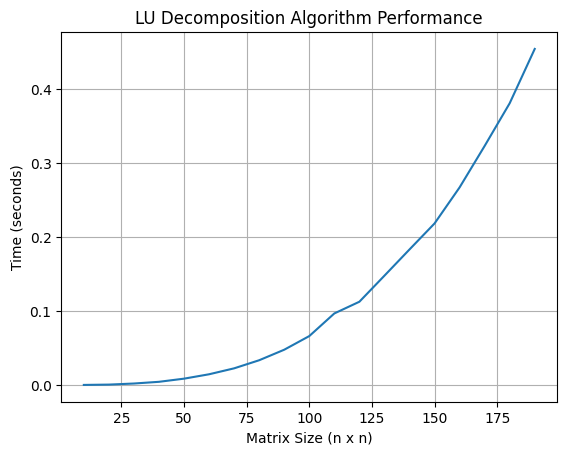

In [28]:
if __name__ == "__main__":
    pass
    import timeit
    import matplotlib.pyplot as plt

    matrix_sizes = []
    times = []

    for n in range(1, 20):
        size = 10 * n
        matrix_sizes.append(size)
        
        start_all = timeit.default_timer()
        A = np.random.randn(size, size)
        lu(A)
        stop_all = timeit.default_timer()
        
        elapsed_time = stop_all - start_all
        times.append(elapsed_time)
        
        print("\nTrial: ", n)
        print("n = ", size)
        print('Time: ', elapsed_time)

    plt.figure()
    plt.plot(matrix_sizes, times)
    plt.title('LU Decomposition Algorithm Performance')
    plt.xlabel('Matrix Size (n x n)')
    plt.ylabel('Time (seconds)')
    plt.grid(True)
    plt.show()


## 3. (Theory) Condition number vs determinant

Consider an $n \times n$ matrix of the form 
$$
A = \begin{bmatrix}
1 & -1 & -1 & \cdots & -1 \\
0 &  1 & -1 & \cdots & -1 \\
0 &  0 &  1 & \cdots & -1 \\
&\vdots  &&\ddots & \vdots \\
0 & 0 &   0 & \cdots & 1
\end{bmatrix}
$$
1. Compute the condition number of $A$ using the infinity norm $\| \cdot \|_\infty$.  
2. Compute the determinant of $A$ and $A^{-1}.$
3. Find an input right-hand side where there is low relative backward error, but high relative forward error.